In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import numpy as np
import warnings
warnings = 'ignore'
%matplotlib inline

## Dataset Description

## link to dataset : https://www.kaggle.com/competitions/rossmann-store-sales/data

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Files
train.csv - historical data including Sales

test.csv - historical data excluding Sales

sample_submission.csv - a sample submission file in the correct format

store.csv - supplemental information about the stores

## Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state
 holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest 
competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not 

participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2 

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.filterwarnings("ignore")
c_green = '#6DF10C'
c_yellow = '#F5DD0D'
c_cyan = '#0FFDEF'
c_blue = '#0141DE'
c_blue_light =  '#2775FD'
c_purple = '#FF0DE5'
c_green_dark = '#1BB200'
e = np.e

In [3]:
ross_df = pd.read_csv('csv\\train.csv')
store_df = pd.read_csv('csv\\store.csv')
test_df = pd.read_csv('csv\\test.csv')

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
merged_train_df = ross_df.merge(store_df,how='left' , on='Store')
merged_test_df = test_df.merge(store_df,how='left' , on='Store')

In [7]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [9]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [11]:
split_date(merged_train_df)
split_date(merged_test_df)

In [12]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [13]:
merged_train_df[merged_train_df.Open == 0 ].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

In [14]:
merged_train_df = merged_train_df[merged_train_df.Open == 1].copy()

In [15]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


### Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [16]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [17]:
comp_months(merged_train_df)
comp_months(merged_test_df)

In [18]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [19]:
merged_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen'],
      dtype='object')

In [20]:
input_cols = ['Store' , 'DayOfWeek' , 'Promo' , 'StateHoliday' , 'Assortment',
              'CompetitionDistance' , 'Day' , 'Month' , 'Year' , 'WeekOfYear' ,
              'Promo2'  , 'CompetitionOpen' , 'SchoolHoliday' , 'StoreType' ]
target_col = 'Sales'

In [21]:
train_inputs = merged_train_df[input_cols].copy()
train_targets = merged_train_df[target_col].copy()

test_inputs = merged_test_df[input_cols].copy()

In [22]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,Assortment,CompetitionDistance,Day,Month,Year,WeekOfYear,Promo2,CompetitionOpen,SchoolHoliday,StoreType
0,1,5,1,0,a,1270.0,31,7,2015,31,0,82.0,1,c
1,2,5,1,0,a,570.0,31,7,2015,31,1,92.0,1,a
2,3,5,1,0,a,14130.0,31,7,2015,31,1,103.0,1,a
3,4,5,1,0,c,620.0,31,7,2015,31,0,70.0,1,c
4,5,5,1,0,a,29910.0,31,7,2015,31,0,3.0,1,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,a,150.0,1,1,2013,1,0,76.0,1,b
1016827,733,2,0,a,b,860.0,1,1,2013,1,0,159.0,1,b
1016863,769,2,0,a,b,840.0,1,1,2013,1,1,0.0,1,b
1017042,948,2,0,a,b,1430.0,1,1,2013,1,0,0.0,1,b


In [23]:
train_inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'Assortment',
       'CompetitionDistance', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2',
       'CompetitionOpen', 'SchoolHoliday', 'StoreType'],
      dtype='object')

In [24]:
numeric_cols = ['Store' , 'Promo' , 'SchoolHoliday' , 
            'CompetitionDistance' ,'CompetitionOpen' , 'Promo2' ,  
            'Day' , 'Month' , 'Year'  , 'WeekOfYear']

categorical_cols = [ 'DayOfWeek' ,'StoreType' , 'Assortment']

In [25]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

CompetitionDistance    2186
Store                     0
Promo                     0
SchoolHoliday             0
CompetitionOpen           0
Promo2                    0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [26]:
test_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

CompetitionDistance    96
Store                   0
Promo                   0
SchoolHoliday           0
CompetitionOpen         0
Promo2                  0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [27]:
max_distance = train_inputs.CompetitionDistance.max()

In [28]:
train_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [29]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [33]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [34]:
train_inputs[numeric_cols].describe()

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Day,Month,Year,WeekOfYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,0.500380,0.446352,0.193580,0.074107,0.030270,0.498684,0.494523,0.440522,0.415969,0.444055
std,0.288808,0.497114,0.395103,0.113142,0.047034,0.499999,0.289449,0.302176,0.388630,0.282153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250449,0.000000,0.000000,0.009098,0.000000,0.000000,0.233333,0.181818,0.000000,0.196078
50%,0.500000,0.000000,0.000000,0.030459,0.011544,0.000000,0.500000,0.454545,0.500000,0.431373
75%,0.750449,1.000000,0.000000,0.090849,0.052670,1.000000,0.733333,0.636364,0.500000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
test_inputs[numeric_cols]

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Day,Month,Year,WeekOfYear
0,0.000000,1.0,0.0,0.016482,0.060606,0.0,0.533333,0.727273,1.0,0.725490
1,0.001795,1.0,0.0,0.186050,0.075758,1.0,0.533333,0.727273,1.0,0.725490
2,0.005386,1.0,0.0,0.316192,0.020924,0.0,0.533333,0.727273,1.0,0.725490
3,0.006284,1.0,0.0,0.098892,0.007937,0.0,0.533333,0.727273,1.0,0.725490
4,0.007181,1.0,0.0,0.026503,0.130592,0.0,0.533333,0.727273,1.0,0.725490
...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.0,0.0,0.024789,0.010101,1.0,0.000000,0.636364,1.0,0.588235
41084,0.997307,0.0,0.0,0.024525,0.080808,0.0,0.000000,0.636364,1.0,0.588235
41085,0.998205,0.0,0.0,0.121835,0.000000,0.0,0.000000,0.636364,1.0,0.588235
41086,0.999102,0.0,0.0,0.011208,0.000000,0.0,0.000000,0.636364,1.0,0.588235


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
train_inputs['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [38]:
train_inputs[categorical_cols]

,DayOfWeek,StoreType,Assortment
0,5,c,a
1,5,a,a
2,5,a,a
3,5,c,c
4,5,a,a
...,...,...,...
1016776,2,b,a
1016827,2,b,b
1016863,2,b,b
1017042,2,b,b


In [39]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [40]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [41]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, train_targets, val_targets = train_test_split(X_train, train_targets, test_size=0.1)

In [44]:
X_train

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Day,Month,Year,WeekOfYear,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
531063,0.994614,0.0,0.0,0.045754,0.025253,1.0,0.400000,0.181818,0.5,0.196078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
505477,0.046679,1.0,0.0,0.400053,0.005051,0.0,0.100000,0.272727,0.5,0.254902,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
634196,0.490126,0.0,0.0,0.118275,0.035354,1.0,0.300000,1.000000,0.0,0.960784,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17984,0.129264,1.0,0.0,0.003428,0.000000,1.0,0.466667,0.545455,1.0,0.549020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
798699,0.026032,1.0,0.0,0.000264,0.000000,1.0,0.466667,0.545455,0.0,0.549020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782941,0.894075,1.0,1.0,0.076741,0.025974,1.0,0.966667,0.545455,0.0,0.588235,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
270065,0.025135,1.0,0.0,0.028349,0.000000,0.0,0.800000,0.909091,0.5,0.921569,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
843166,0.907540,1.0,0.0,0.083201,0.077922,1.0,0.166667,0.454545,0.0,0.431373,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
112431,0.835727,0.0,0.0,0.206751,0.000000,1.0,0.700000,0.272727,1.0,0.313725,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
X_val

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Day,Month,Year,WeekOfYear,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
245320,0.561939,0.0,1.0,0.052083,0.041126,0.0,0.700000,1.000000,0.5,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
937076,0.131059,0.0,0.0,0.112342,0.000000,0.0,0.400000,0.181818,0.0,0.196078,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
150061,0.584381,1.0,0.0,0.268592,0.000000,0.0,0.600000,0.181818,1.0,0.215686,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
670166,0.750449,1.0,0.0,0.192247,0.000000,0.0,0.233333,0.909091,0.0,0.862745,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
935506,0.723519,0.0,0.0,0.050765,0.042569,0.0,0.466667,0.181818,0.0,0.196078,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898084,0.160682,0.0,0.0,0.076213,0.022367,0.0,0.533333,0.272727,0.0,0.294118,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
539430,0.498205,1.0,0.0,0.014768,0.000000,0.0,0.133333,0.181818,0.5,0.176471,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
223326,0.292639,1.0,0.0,0.018064,0.087302,0.0,0.366667,0.000000,1.0,0.039216,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
269177,0.076302,1.0,0.0,0.006065,0.084416,1.0,0.833333,0.909091,0.5,0.921569,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
def rmse(targets , predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

def mse(targets , predictions):
    return np.mean(np.square(targets-predictions))

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

> **EXERCISE**: Can you describe in your own words how a gradient boosting machine is different from a random forest?


For a mathematical explanation of gradient boosting, check out the following resources:

- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)
- [Video Tutorials on StatQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6)

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



In [47]:
from sklearn.metrics import r2_score ,accuracy_score

In [48]:
from xgboost import XGBRegressor

In [49]:
## Model Training and Hyper parameter Tuning
xgb_model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.1, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)
# Fiting Model to Dataset -- X_train, train_targets
xgb_model.fit(X_train,train_targets)

# Making Prediction
train_preds = xgb_model.predict(X_train)
val_preds = xgb_model.predict(X_val)
r_2_score = xgb_model.score(X_train,train_targets)
accuracy = xgb_model.score(X_train,train_targets)*100

print(xgb_model)
print('Training RMSE : ',rmse(train_targets,train_preds))
print('Testing RMSE : ',rmse(val_targets,val_preds))
print('Model R_2 score : ',r_2_score)
print('Model Accuracy : ',accuracy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)
Training RMSE :  478.1858307460757
Testing RMSE :  661.4977225128681
Model R_2 score :  0.9762244632364858
Model Accuracy :  97.62244632364857


In [50]:
importance_xgbregressor_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [51]:
importance_xgbregressor_df.head()

,feature,importance
18,StoreType_b,0.186362
1,Promo,0.124818
16,DayOfWeek_7,0.082846
3,CompetitionDistance,0.066970
22,Assortment_b,0.060161


In [52]:
from sklearn.metrics import r2_score

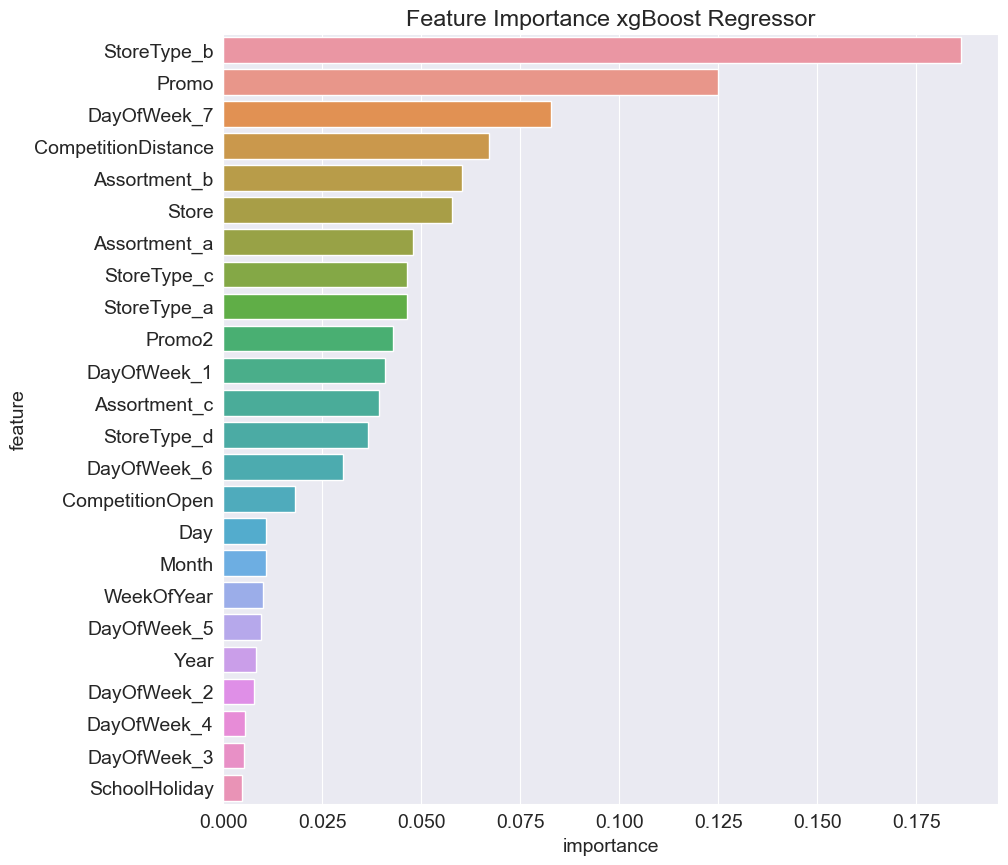

In [53]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance xgBoost Regressor')
sns.barplot(data=importance_xgbregressor_df, x='importance', y='feature')
plt.show()

## Decision Tree Regressor

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

<img src=https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html>
Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.

Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

Able to handle multi-output problems.

Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [56]:
## Model Training and Hyper parameter Tuning
decision_tree_model = DecisionTreeRegressor(random_state=12 , max_depth=12 , max_leaf_nodes=2**20 ,min_samples_split=15 )
# Fiting Model to Dataset -- X_train, train_targets
decision_tree_model.fit(X_train,train_targets)

# Making Prediction
train_preds = decision_tree_model.predict(X_train)
val_preds = decision_tree_model.predict(X_val)
r_2_score = decision_tree_model.score(X_train,train_targets)
accuracy = decision_tree_model.score(X_train,train_targets)*100

print(decision_tree_model)
print('Training RMSE : ',rmse(train_targets,train_preds))
print('Testing RMSE : ',rmse(val_targets,val_preds))
print('Model r_2 score : ',r_2_score)
print('Model Accuracy : ',accuracy)

DecisionTreeRegressor(max_depth=12, max_leaf_nodes=1048576,
                      min_samples_split=15, random_state=12)
Training RMSE :  2127.740153907305
Testing RMSE :  2169.8698889332177
Model r_2 score :  0.5292675874480097
Model Accuracy :  52.92675874480097


In [57]:
decision_tree_model.feature_importances_

array([1.48931304e-01, 2.56006981e-01, 2.96457207e-03, 2.32836244e-01,
       3.70130569e-02, 4.59559801e-02, 3.01794072e-02, 9.45197938e-03,
       3.39220198e-03, 4.29458132e-02, 5.58710665e-02, 1.52918897e-03,
       4.85616703e-05, 1.58919051e-04, 4.45749543e-03, 9.82041430e-03,
       8.02074520e-03, 7.49852570e-03, 4.67690509e-02, 1.35016198e-02,
       5.12229648e-03, 8.14067154e-03, 1.94870151e-03, 2.74352030e-02])

In [58]:
importance_decision_tree_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': decision_tree_model.feature_importances_
}).sort_values('importance', ascending=False)

In [59]:
importance_decision_tree_df.head(5)

,feature,importance
1,Promo,0.256007
3,CompetitionDistance,0.232836
0,Store,0.148931
10,DayOfWeek_1,0.055871
18,StoreType_b,0.046769


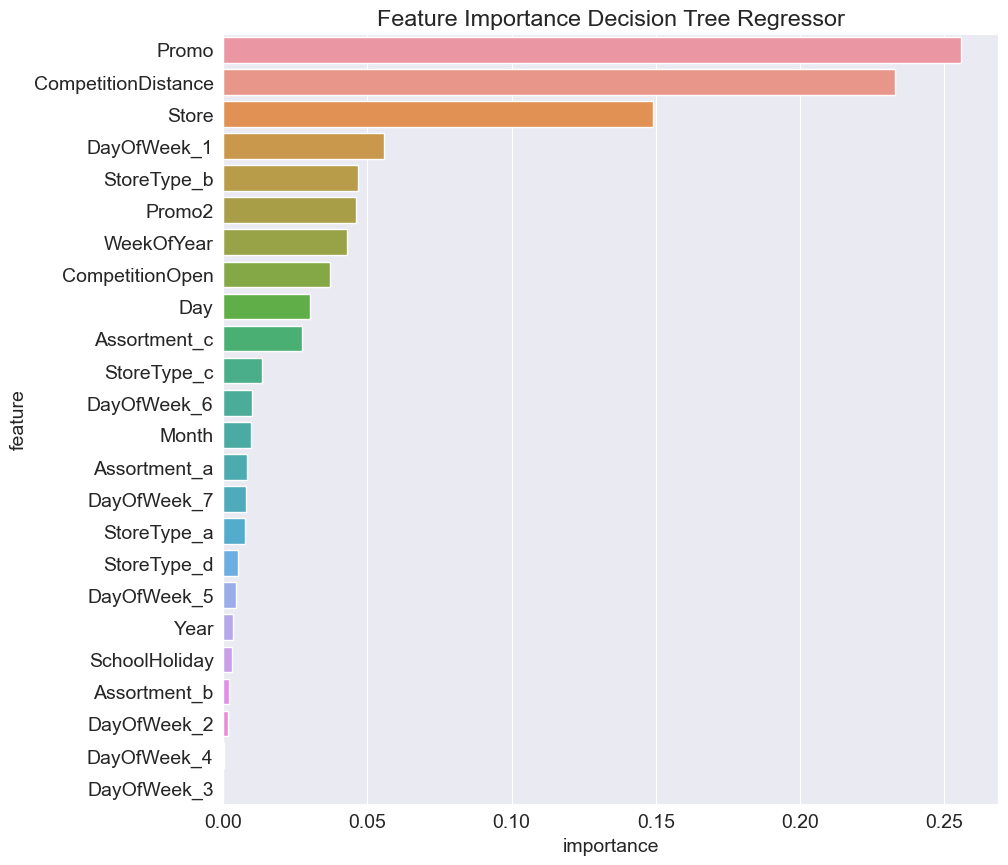

In [60]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance Decision Tree Regressor')
sns.barplot(data=importance_decision_tree_df, x='importance', y='feature')
plt.show()

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.

In [61]:
import joblib

In [80]:
rossman_xgboost_model = {
    'model': xgb_model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'train_inputs'  : train_inputs,
    'train_targets' : train_targets,
    'test_inputs' : test_inputs,
    'X_train' : X_train,
    'X_test' : X_test,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [81]:
joblib.dump(rossman_xgboost_model, "files\\rossman_xgboost_model.joblib")

['files\\rossman_xgboost_model.joblib']

In [82]:
joblib.load("files\\rossman_xgboost_model.joblib")

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 'scaler': MinMaxScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False),
 'input_cols': ['Store',
  'DayOfWeek',
  'Promo',
  'StateHoliday',
  'Assortment',
  'CompetitionDistance',
  'Day',
  'Mont

In [83]:
rossman_xgboost_model['train_inputs']

,Store,DayOfWeek,Promo,StateHoliday,Assortment,CompetitionDistance,Day,Month,Year,WeekOfYear,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,5,1.0,0,a,0.016482,1.0,0.545455,1.0,0.588235,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,5,1.0,0,a,0.007252,1.0,0.545455,1.0,0.588235,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,5,1.0,0,a,0.186050,1.0,0.545455,1.0,0.588235,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,5,1.0,0,c,0.007911,1.0,0.545455,1.0,0.588235,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,5,1.0,0,a,0.394119,1.0,0.545455,1.0,0.588235,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,2,0.0,a,a,0.001714,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,2,0.0,a,b,0.011076,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.689408,2,0.0,a,b,0.010812,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,0.850090,2,0.0,a,b,0.018592,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [98]:
test_preds = rossman_xgboost_model['model'].predict(X_test)

In [99]:
rossman_xgboost_model['model']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
test_preds

array([ 4263.4844,  7701.528 ,  9721.233 , ...,  6694.6157, 23611.9   ,
        7094.5205], dtype=float32)

In [111]:
submisson_df =pd.read_csv('csv\\sample_submission.csv')

In [113]:
submisson_df['Sales'] = test_preds

In [114]:
submisson_df

,Id,Sales
0,1,4263.484375
1,2,7701.527832
2,3,9721.233398
3,4,7031.299316
4,5,7319.463379
...,...,...
41083,41084,3014.249268
41084,41085,7358.912109
41085,41086,6694.615723
41086,41087,23611.900391


In [115]:
submisson_df.to_csv('csv\\submisson_df.csv' , index=False)